In [236]:
# Name: Ali Khatami
# Course: DSC530-T301
# Final Project: AirBNB price analysis

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy import stats
import thinkplot
import thinkstats2

In [238]:
"""
1.  Your dataset
"""

'\n1.  Your dataset\n'

In [239]:
# Read all the csv files in the folder
data_list = glob.glob('Airbnb Prices in Europe/*.csv')

# Now we can use pandas to read all the csv files and combine them into one
df = pd.concat(map(pd.read_csv, data_list))

# Cross-Featuring the longitude and latitude
df['lng-lat'] = df['lng'] * df['lat'] / 1000000

# Drop the index column
df.drop(['Unnamed: 0', 'rest_index_norm', 'attr_index_norm', 'room_private', 'room_shared', 'cleanliness_rating', 'lng', 'lat'], axis=1, inplace=True)

# Check if there are any null values
df.isnull().sum()

realSum                       0
room_type                     0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
rest_index                    0
lng-lat                       0
dtype: int64

In [240]:
"""
2.  A minimum of 5 variables in your dataset used during your analysis
"""

'\n2.  A minimum of 5 variables in your dataset used during your analysis\n'

In [241]:
# Getting the first 5 rows of the data
df.head()

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng-lat
0,194.033698,Private room,2.0,False,1,0,93.0,1,5.022964,2.539380,78.690379,98.253896,0.000257
1,344.245776,Private room,4.0,False,0,0,85.0,1,0.488389,0.239404,631.176378,837.280757,0.000257
2,264.101422,Private room,2.0,False,0,1,87.0,1,5.748312,3.651621,75.275877,95.386955,0.000261
3,433.529398,Private room,4.0,False,0,1,90.0,2,0.384862,0.439876,493.272534,875.033098,0.000256
4,485.552926,Private room,2.0,True,0,0,98.0,1,0.544738,0.318693,552.830324,815.305740,0.000257


In [242]:
# Transforming room_type to a dummy variable
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

In [243]:
"""
3.  Include a histogram of each of the 5 variables
"""

'\n3.  Include a histogram of each of the 5 variables\n'

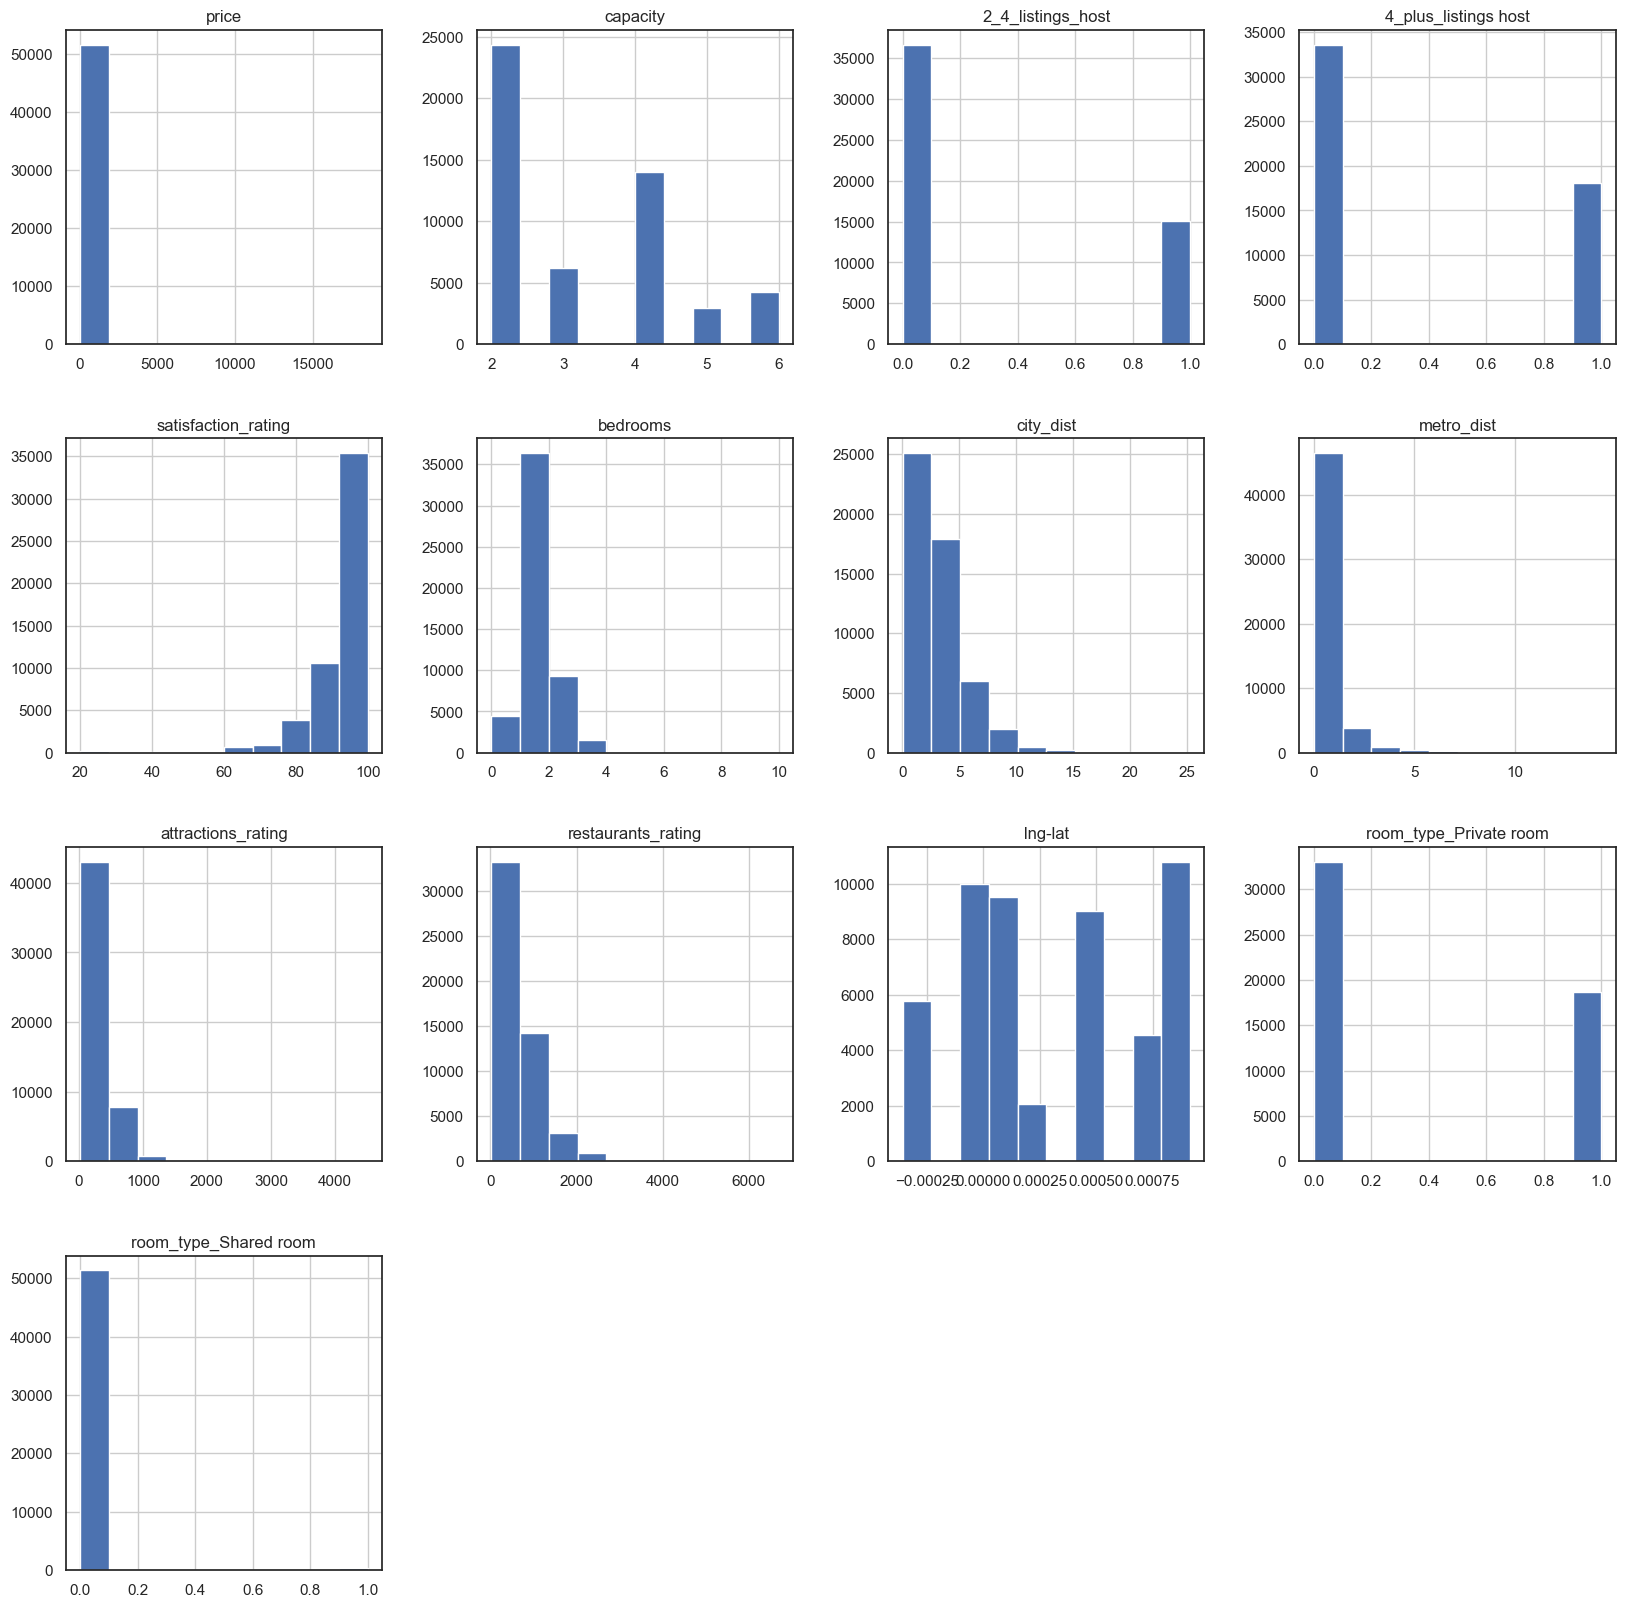

In [244]:
# Changing the column names
df.rename(columns={
    'realSum': 'price', 'person_capacity': 'capacity', 'multi': '2_4_listings_host', 'biz': '4_plus_listings host', 'guest_satisfaction_overall': 'satisfaction_rating', 'dist': 'city_dist', 'attr_index': 'attractions_rating', 'rest_index': 'restaurants_rating'}, inplace=True)

# Changing the data distributions
df.hist(figsize=(20, 20))
plt.show()

In [245]:
# Calculating the correlation matrix and round to 4 decimals
df.corr().round(4)

,price,capacity,host_is_superhost,2_4_listings_host,4_plus_listings host,satisfaction_rating,bedrooms,city_dist,metro_dist,attractions_rating,restaurants_rating,lng-lat,room_type_Private room,room_type_Shared room
price,1.0000,0.2031,-0.0455,-0.0529,0.0371,-0.0019,0.2217,-0.0447,-0.0610,0.1782,0.1347,-0.1692,-0.1719,-0.0351
capacity,0.2031,1.0000,0.0314,-0.0543,0.1107,0.0052,0.5606,-0.1285,-0.0373,0.0284,0.0373,0.1391,-0.5000,0.0351
host_is_superhost,-0.0455,0.0314,1.0000,0.0975,-0.1085,0.2801,0.0242,-0.0561,-0.0007,-0.0263,-0.0351,0.1810,-0.0495,-0.0278
2_4_listings_host,-0.0529,-0.0543,0.0975,1.0000,-0.4707,0.0543,-0.0007,0.0334,0.0434,0.0063,0.0071,0.0400,0.1370,-0.0161
4_plus_listings host,0.0371,0.1107,-0.1085,-0.4707,1.0000,-0.2082,-0.0267,-0.1648,-0.1092,0.1147,0.1377,-0.0963,-0.0402,0.0444
satisfaction_rating,-0.0019,0.0052,0.2801,0.0543,-0.2082,1.0000,0.0476,-0.0042,0.0298,-0.0506,-0.0693,0.1585,-0.0334,-0.0279
bedrooms,0.2217,0.5606,0.0242,-0.0007,-0.0267,0.0476,1.0000,-0.0063,0.0444,-0.0117,-0.0140,0.0049,-0.1559,-0.0214
city_dist,-0.0447,-0.1285,-0.0561,0.0334,-0.1648,-0.0042,-0.0063,1.0000,0.5581,-0.3631,-0.3467,-0.1362,0.2134,0.0141
metro_dist,-0.0610,-0.0373,-0.0007,0.0434,-0.1092,0.0298,0.0444,0.5581,1.0000,-0.1680,-0.1389,-0.0670,0.1020,-0.0029
attractions_rating,0.1782,0.0284,-0.0263,0.0063,0.1147,-0.0506,-0.0117,-0.3631,-0.1680,1.0000,0.8502,-0.1472,-0.0223,-0.0315


Generating a heatmap visualization of the correlation matrix for the dataset using Seaborn and Matplotlib libraries. The first few lines set the style of the visualization to a white background. The correlation matrix is computed from the data and a mask is generated to hide the upper triangle of the matrix. Then, a custom colormap is generated and a heatmap is drawn using Seaborn. The resulting heatmap shows the correlations between the variables in the dataset, where red indicates positive correlation and blue indicates negative correlation.

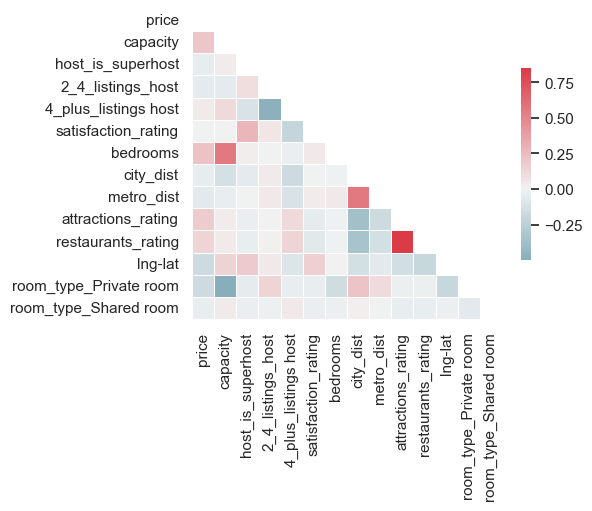

In [246]:
# Set the style of the visualization
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the multi-collinear heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Highly correlated variables in a dataset can cause issues in statistical analysis. When two variables are highly correlated, they contain redundant information, which can skew the results of analysis or models. Hence we remove them.

In [247]:
# Removing highly correlated variables
df.drop(['attractions_rating', 'capacity', 'metro_dist'], axis=1, inplace=True)

The purpose of this code is to visualize the distribution of the logarithmically transformed numerical variables to better understand where the median and mean fall and how the outliers are distributed. The logarithmic transformation is used to normalize the data and reduce the skewness of the distribution.

In [248]:
# Setting numerical variables
num_vars = ['price', 'city_dist', 'rating', 'restaurants_rating', 'lng-lat', 'bedrooms']

# Plotting the log transformation of all numerical variables
np.log(df[num_vars] + 0.01).hist(figsize=(10, 10))
plt.show()

KeyError: "['rating'] not in index"

In [ ]:
"""
4.  Identify any outliers and explain the reasoning for them being outliers
"""

This code is used to identify outliers in the 'price' variable of a dataframe df using the z-score method and the threshold of 3 standard deviations away from the mean. Based on the results, we see price values over 1263 have been assigned as outliers as they are 3 standard deviations away from the mean.

In [ ]:
z_scores = stats.zscore(df['price'])
outliers = df[abs(z_scores) > 3]
print(f"Minimum outlier price: {outliers['price'].min()}")
outliers

In [ ]:
"""
5.  How you believe they should be handled
6.  Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails
"""

The outliers are then removed from the dataframe and we get the new descriptive statistics of the dataframe that shows the mean and standard deviation of all the variables.

In [ ]:
# remove outliers using the z-score method
df = df.loc[abs(z_scores) < 3, :]

# calculate summary statistics for the updated dataframe
stats = df.describe()

# calculate skewness for each column
skewness = df.skew()
skewness.name = 'skewness'

# add the skewness row to the summary statistics dataframe
summary_stats = stats.append(skewness)

print(summary_stats)

In [ ]:
"""
7.  Compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter.
"""

In [ ]:
# assume your dataframe is called 'df'
houses_2br = df[df['bedrooms'] == 2]
all_houses = df[df['bedrooms'] == 4]

# create PMFs for each subset
pmf_2br = thinkstats2.Pmf(houses_2br['satisfaction_rating'])
pmf_all = thinkstats2.Pmf(all_houses['satisfaction_rating'])

# plot the PMFs using thinkplot.Pmf
thinkplot.PrePlot(2)
thinkplot.Pmf(pmf_2br, label='2 bedroom houses', color='red')
thinkplot.Pmf(pmf_all, label='4 bedroom houses', color='blue')
thinkplot.Show(xlabel='Price', ylabel='PMF')